In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
import statsmodels.formula.api as smf
from pylab import *
import datetime

%matplotlib inline

df = pd.read_excel('Analyst_Data.xls', sheetname=6)
df

,Неделя продаж,Яблоко,Вишня,Манго,Крыжовник,Киви,Хурма,Апельсин,Груши,Сливы,Абрикосы,Персики,Грейфрут,Мандарин,Нектарин,Финики,Брусника,Черника,Клюква
0,27 Apr - 29 Apr,1968,852,66,1128,12,25,17,55100,100609,17118,3468,1435,277,828,16,0,0,0
1,30 Apr - 06 May,5147,1062,177,2600,33,600,142,63147,132165,23214,5068,4512,827,2249,196,0,0,0
2,07 May - 13 May,18683,720,147,2152,21,425,145,38304,56018,10599,2758,3111,666,1628,308,0,0,0
3,14 May - 20 May,20153,795,90,2056,26,250,150,34850,44331,12283,2354,2756,564,1754,364,0,0,0
4,21 May - 27 May,13271,858,111,2338,19,250,173,28504,46833,9333,2616,2552,529,1792,498,0,0,0
5,28 May - 03 Jun,22630,678,171,2578,14,200,265,26093,48987,51277,3454,3813,734,2499,612,0,0,0
6,04 Jun - 10 Jun,20933,495,117,2672,34,75,236,26102,52816,25971,2220,2662,473,2099,668,0,0,0
7,11 Jun - 17 Jun,22231,546,84,2166,25,75,227,16573,31310,19997,1856,2671,384,1797,718,0,0,0
8,18 Jun - 24 Jun,23404,603,69,2590,32,75,264,15392,29958,20639,1756,2981,589,1537,794,0,0,0
9,25 Jun - 01 Jul,21291,600,81,2232,34,150,219,13891,29367,17901,1684,1824,301,1492,738,0,0,0


In [2]:
## data exploration
df.apply(pd.to_numeric, errors='ignore').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 19 columns):
Неделя продаж    51 non-null object
Яблоко           51 non-null int64
Вишня            51 non-null int64
Манго            51 non-null int64
Крыжовник        51 non-null int64
Киви             51 non-null int64
Хурма            51 non-null int64
Апельсин         51 non-null int64
Груши            51 non-null int64
Сливы            51 non-null int64
Абрикосы         51 non-null int64
Персики          51 non-null int64
Грейфрут         51 non-null int64
Мандарин         51 non-null int64
Нектарин         51 non-null int64
Финики           51 non-null int64
Брусника         51 non-null int64
Черника          51 non-null int64
Клюква           51 non-null int64
dtypes: int64(18), object(1)
memory usage: 7.6+ KB


можем видеть, что представлено 52 недели, что покрывает целый календарный год. Также мы проверили тип данных для дальнейших расчетов.

In [3]:
## change kg to tonna
df[df.columns[1:20]] = df[df.columns[1:20]] / 1000
df

,Неделя продаж,Яблоко,Вишня,Манго,Крыжовник,Киви,Хурма,Апельсин,Груши,Сливы,Абрикосы,Персики,Грейфрут,Мандарин,Нектарин,Финики,Брусника,Черника,Клюква
0,27 Apr - 29 Apr,1.968,0.852,0.066,1.128,0.012,0.025,0.017,55.100,100.609,17.118,3.468,1.435,0.277,0.828,0.016,0.000,0.000,0.000
1,30 Apr - 06 May,5.147,1.062,0.177,2.600,0.033,0.600,0.142,63.147,132.165,23.214,5.068,4.512,0.827,2.249,0.196,0.000,0.000,0.000
2,07 May - 13 May,18.683,0.720,0.147,2.152,0.021,0.425,0.145,38.304,56.018,10.599,2.758,3.111,0.666,1.628,0.308,0.000,0.000,0.000
3,14 May - 20 May,20.153,0.795,0.090,2.056,0.026,0.250,0.150,34.850,44.331,12.283,2.354,2.756,0.564,1.754,0.364,0.000,0.000,0.000
4,21 May - 27 May,13.271,0.858,0.111,2.338,0.019,0.250,0.173,28.504,46.833,9.333,2.616,2.552,0.529,1.792,0.498,0.000,0.000,0.000
5,28 May - 03 Jun,22.630,0.678,0.171,2.578,0.014,0.200,0.265,26.093,48.987,51.277,3.454,3.813,0.734,2.499,0.612,0.000,0.000,0.000
6,04 Jun - 10 Jun,20.933,0.495,0.117,2.672,0.034,0.075,0.236,26.102,52.816,25.971,2.220,2.662,0.473,2.099,0.668,0.000,0.000,0.000
7,11 Jun - 17 Jun,22.231,0.546,0.084,2.166,0.025,0.075,0.227,16.573,31.310,19.997,1.856,2.671,0.384,1.797,0.718,0.000,0.000,0.000
8,18 Jun - 24 Jun,23.404,0.603,0.069,2.590,0.032,0.075,0.264,15.392,29.958,20.639,1.756,2.981,0.589,1.537,0.794,0.000,0.000,0.000
9,25 Jun - 01 Jul,21.291,0.600,0.081,2.232,0.034,0.150,0.219,13.891,29.367,17.901,1.684,1.824,0.301,1.492,0.738,0.000,0.000,0.000


In [4]:
## Понижение размерности
## разобьем датасет на три группы
all_fruit = df.columns[1:20]
plod = ['Яблоко', 'Груши', "Сливы", "Абрикосы", "Персики", "Нектарин"]
berry = ['Вишня', 'Крыжовник', 'Брусника', 'Черника', 'Клюква']
imported = ['Манго', 'Киви', 'Хурма', 'Апельсин', 'Грейфрут', 'Мандарин', 'Финики']

In [5]:
## check all columns are included 
df[berry]

,Вишня,Крыжовник,Брусника,Черника,Клюква
0,0.852,1.128,0.000,0.000,0.000
1,1.062,2.600,0.000,0.000,0.000
2,0.720,2.152,0.000,0.000,0.000
3,0.795,2.056,0.000,0.000,0.000
4,0.858,2.338,0.000,0.000,0.000
5,0.678,2.578,0.000,0.000,0.000
6,0.495,2.672,0.000,0.000,0.000
7,0.546,2.166,0.000,0.000,0.000
8,0.603,2.590,0.000,0.000,0.000
9,0.600,2.232,0.000,0.000,0.000


In [6]:
## basic computing
agg = df[all_fruit].agg([sum, np.mean, np.std]).applymap(lambda x: float('%.2f' % x))
agg

,Яблоко,Вишня,Манго,Крыжовник,Киви,Хурма,Апельсин,Груши,Сливы,Абрикосы,Персики,Грейфрут,Мандарин,Нектарин,Финики,Брусника,Черника,Клюква
sum,1100.25,39.60,7.36,51.92,1.07,6.15,20.95,758.07,2153.90,1063.47,91.81,109.69,25.11,141.80,55.69,85.06,8.45,4.53
mean,21.57,0.78,0.14,1.02,0.02,0.12,0.41,14.86,42.23,20.85,1.80,2.15,0.49,2.78,1.09,1.67,0.17,0.09
std,7.59,0.77,0.09,0.77,0.01,0.11,0.17,11.49,26.62,10.03,0.84,1.01,0.23,2.05,0.46,1.15,0.23,0.12


In [7]:
agg[plod].loc['sum'].sum()

5309.300000000001

In [8]:
df_analyze = agg.transpose()

In [9]:
df_analyze = df_analyze.sort_values('sum', ascending=False)
df_analyze

,sum,mean,std
Сливы,2153.90,42.23,26.62
Яблоко,1100.25,21.57,7.59
Абрикосы,1063.47,20.85,10.03
Груши,758.07,14.86,11.49
Нектарин,141.80,2.78,2.05
Грейфрут,109.69,2.15,1.01
Персики,91.81,1.80,0.84
Брусника,85.06,1.67,1.15
Финики,55.69,1.09,0.46
Крыжовник,51.92,1.02,0.77


In [10]:
df_analyze['percent'] = df_analyze['sum'].apply(lambda x: 100 * x / float(df_analyze['sum'].sum()))

In [11]:
df_analyze = df_analyze.applymap(lambda x: float('%.f' % x))
df_analyze

,sum,mean,std,percent
Сливы,2154.0,42.0,27.0,38.0
Яблоко,1100.0,22.0,8.0,19.0
Абрикосы,1063.0,21.0,10.0,19.0
Груши,758.0,15.0,11.0,13.0
Нектарин,142.0,3.0,2.0,2.0
Грейфрут,110.0,2.0,1.0,2.0
Персики,92.0,2.0,1.0,2.0
Брусника,85.0,2.0,1.0,1.0
Финики,56.0,1.0,0.0,1.0
Крыжовник,52.0,1.0,1.0,1.0


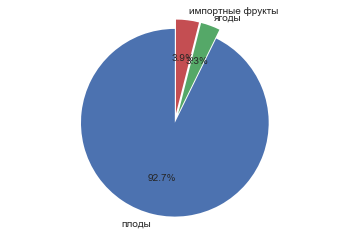

In [12]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['плоды', "ягоды", "импортные фрукты"]
sizes = [agg[plod].loc['sum'].sum(), agg[berry].loc['sum'].sum(), agg[imported].loc['sum'].sum()]
explode = (0, 0.1, 0.1)  
fig1, ax1 = plt.subplots()
fig1 = plt.figure(figsize=(22, 22))


ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()


In [13]:
df_analyze['sum'].sum()


5725.0

In [14]:
df_analyze['sum'].cumsum()

Сливы        2154.0
Яблоко       3254.0
Абрикосы     4317.0
Груши        5075.0
Нектарин     5217.0
Грейфрут     5327.0
Персики      5419.0
Брусника     5504.0
Финики       5560.0
Крыжовник    5612.0
Вишня        5652.0
Мандарин     5677.0
Апельсин     5698.0
Черника      5706.0
Манго        5713.0
Хурма        5719.0
Клюква       5724.0
Киви         5725.0
Name: sum, dtype: float64

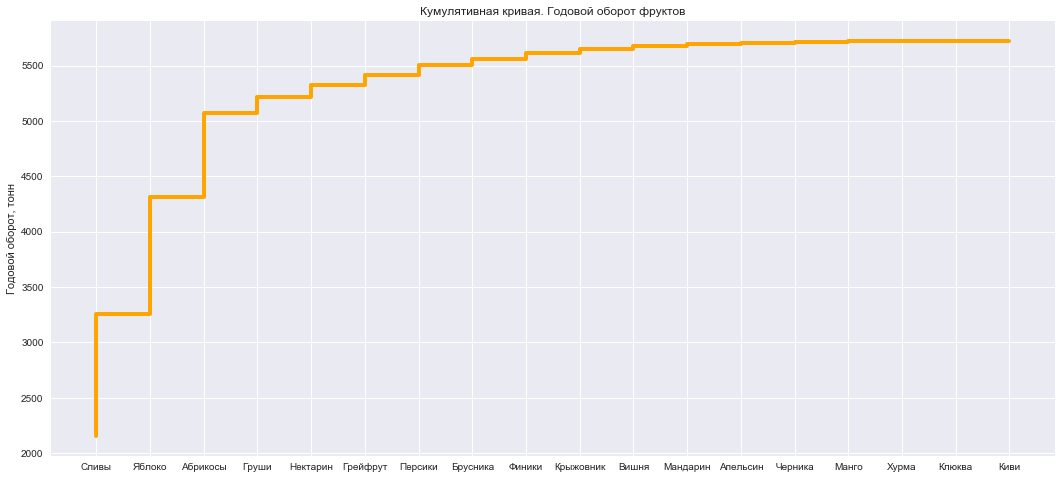

In [15]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1,1,1)

plt.xticks(range(len(df_analyze['sum'].index)), df_analyze['sum'].index)


y_tick = df_analyze['sum'].cumsum()
ax.plot(range(len(df_analyze['sum'].index)), y_tick, drawstyle='steps', color='orange', linewidth=4)
ax.set_ylabel('Годовой оборот, тонн')
ax.set_title("Кумулятивная кривая. Годовой оборот фруктов")



In [16]:
range(len(df_analyze['sum'].index))

range(0, 18)

In [17]:
df[plod]

,Яблоко,Груши,Сливы,Абрикосы,Персики,Нектарин
0,1.968,55.100,100.609,17.118,3.468,0.828
1,5.147,63.147,132.165,23.214,5.068,2.249
2,18.683,38.304,56.018,10.599,2.758,1.628
3,20.153,34.850,44.331,12.283,2.354,1.754
4,13.271,28.504,46.833,9.333,2.616,1.792
5,22.630,26.093,48.987,51.277,3.454,2.499
6,20.933,26.102,52.816,25.971,2.220,2.099
7,22.231,16.573,31.310,19.997,1.856,1.797
8,23.404,15.392,29.958,20.639,1.756,1.537
9,21.291,13.891,29.367,17.901,1.684,1.492


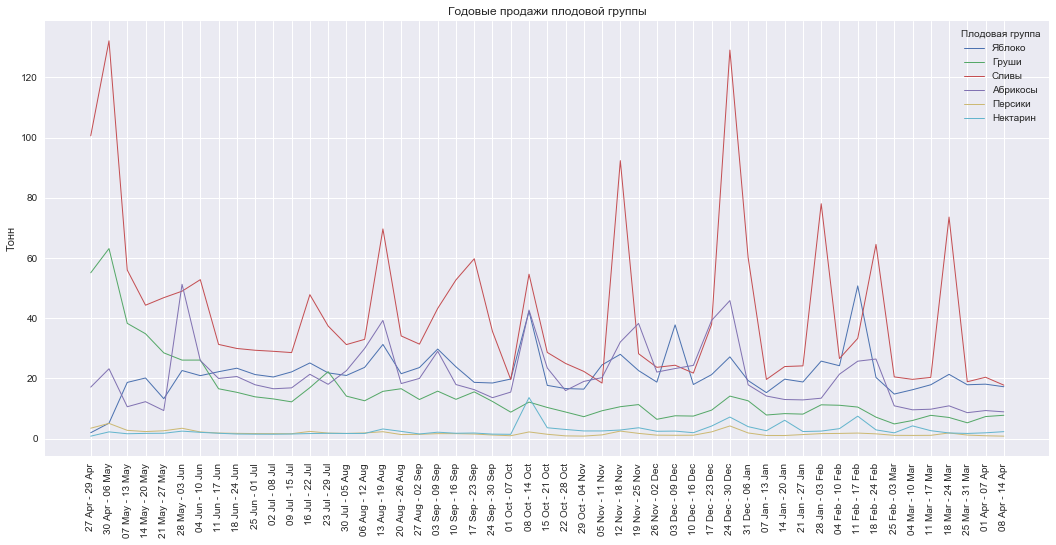

In [18]:
## строим график Плодовых
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1,1,1)
plt.xticks(range(len(df['Неделя продаж'])), df['Неделя продаж'])
xrange = range(len(df['Неделя продаж']))
for i in plod:
    ax.plot(list(xrange), df[i], linewidth=1, label=i)
#plt.yticks(range(275, 400, 25))
ax.legend(loc=1, title='Плодовая группа')
plt.xticks(rotation='vertical')
ax.set_ylabel('Тонн')
ax.set_title("Годовые продажи плодовой группы")

In [19]:
df

,Неделя продаж,Яблоко,Вишня,Манго,Крыжовник,Киви,Хурма,Апельсин,Груши,Сливы,Абрикосы,Персики,Грейфрут,Мандарин,Нектарин,Финики,Брусника,Черника,Клюква
0,27 Apr - 29 Apr,1.968,0.852,0.066,1.128,0.012,0.025,0.017,55.100,100.609,17.118,3.468,1.435,0.277,0.828,0.016,0.000,0.000,0.000
1,30 Apr - 06 May,5.147,1.062,0.177,2.600,0.033,0.600,0.142,63.147,132.165,23.214,5.068,4.512,0.827,2.249,0.196,0.000,0.000,0.000
2,07 May - 13 May,18.683,0.720,0.147,2.152,0.021,0.425,0.145,38.304,56.018,10.599,2.758,3.111,0.666,1.628,0.308,0.000,0.000,0.000
3,14 May - 20 May,20.153,0.795,0.090,2.056,0.026,0.250,0.150,34.850,44.331,12.283,2.354,2.756,0.564,1.754,0.364,0.000,0.000,0.000
4,21 May - 27 May,13.271,0.858,0.111,2.338,0.019,0.250,0.173,28.504,46.833,9.333,2.616,2.552,0.529,1.792,0.498,0.000,0.000,0.000
5,28 May - 03 Jun,22.630,0.678,0.171,2.578,0.014,0.200,0.265,26.093,48.987,51.277,3.454,3.813,0.734,2.499,0.612,0.000,0.000,0.000
6,04 Jun - 10 Jun,20.933,0.495,0.117,2.672,0.034,0.075,0.236,26.102,52.816,25.971,2.220,2.662,0.473,2.099,0.668,0.000,0.000,0.000
7,11 Jun - 17 Jun,22.231,0.546,0.084,2.166,0.025,0.075,0.227,16.573,31.310,19.997,1.856,2.671,0.384,1.797,0.718,0.000,0.000,0.000
8,18 Jun - 24 Jun,23.404,0.603,0.069,2.590,0.032,0.075,0.264,15.392,29.958,20.639,1.756,2.981,0.589,1.537,0.794,0.000,0.000,0.000
9,25 Jun - 01 Jul,21.291,0.600,0.081,2.232,0.034,0.150,0.219,13.891,29.367,17.901,1.684,1.824,0.301,1.492,0.738,0.000,0.000,0.000


In [20]:
df.index = pd.DatetimeIndex(freq='w', start='2017-04-26', periods=51)

In [21]:
len(df.index)

51

In [22]:
df

,Неделя продаж,Яблоко,Вишня,Манго,Крыжовник,Киви,Хурма,Апельсин,Груши,Сливы,Абрикосы,Персики,Грейфрут,Мандарин,Нектарин,Финики,Брусника,Черника,Клюква
2017-04-30,27 Apr - 29 Apr,1.968,0.852,0.066,1.128,0.012,0.025,0.017,55.100,100.609,17.118,3.468,1.435,0.277,0.828,0.016,0.000,0.000,0.000
2017-05-07,30 Apr - 06 May,5.147,1.062,0.177,2.600,0.033,0.600,0.142,63.147,132.165,23.214,5.068,4.512,0.827,2.249,0.196,0.000,0.000,0.000
2017-05-14,07 May - 13 May,18.683,0.720,0.147,2.152,0.021,0.425,0.145,38.304,56.018,10.599,2.758,3.111,0.666,1.628,0.308,0.000,0.000,0.000
2017-05-21,14 May - 20 May,20.153,0.795,0.090,2.056,0.026,0.250,0.150,34.850,44.331,12.283,2.354,2.756,0.564,1.754,0.364,0.000,0.000,0.000
2017-05-28,21 May - 27 May,13.271,0.858,0.111,2.338,0.019,0.250,0.173,28.504,46.833,9.333,2.616,2.552,0.529,1.792,0.498,0.000,0.000,0.000
2017-06-04,28 May - 03 Jun,22.630,0.678,0.171,2.578,0.014,0.200,0.265,26.093,48.987,51.277,3.454,3.813,0.734,2.499,0.612,0.000,0.000,0.000
2017-06-11,04 Jun - 10 Jun,20.933,0.495,0.117,2.672,0.034,0.075,0.236,26.102,52.816,25.971,2.220,2.662,0.473,2.099,0.668,0.000,0.000,0.000
2017-06-18,11 Jun - 17 Jun,22.231,0.546,0.084,2.166,0.025,0.075,0.227,16.573,31.310,19.997,1.856,2.671,0.384,1.797,0.718,0.000,0.000,0.000
2017-06-25,18 Jun - 24 Jun,23.404,0.603,0.069,2.590,0.032,0.075,0.264,15.392,29.958,20.639,1.756,2.981,0.589,1.537,0.794,0.000,0.000,0.000
2017-07-02,25 Jun - 01 Jul,21.291,0.600,0.081,2.232,0.034,0.150,0.219,13.891,29.367,17.901,1.684,1.824,0.301,1.492,0.738,0.000,0.000,0.000


/Users/greg.fetisov/anaconda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


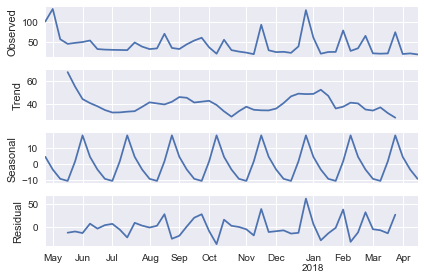

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Сливы'], model='addictive', freq=6)
result.plot()
plt.show()

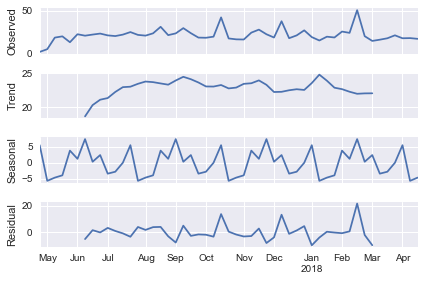

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Яблоко'], model='addictive', freq=12)
result.plot()
plt.show()

In [25]:
##convert so season
season_list = []
for i in df.index:
    m = i.month
    if m > 2 and m < 6:
        season_list.append('spring')
    if m > 5 and m < 9:
        season_list.append('summer')
    if m > 8 and m < 12:
        season_list.append('autumn')
    if m > 11 or m < 3:
        season_list.append('winter')



In [26]:
len(season_list)
df['season'] = season_list

In [27]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
sn_ls = []
for name in all_fruit:
    current = df[name]
    mod = ols('current ~ season', data=df).fit()
    aov_table = sm.stats.anova_lm(mod, typ=2)
    if aov_table['PR(>F)'][0] < 0.05:
        print(name)
        sn_ls.append(name)

Яблоко
Манго
Крыжовник
Киви
Апельсин
Груши
Абрикосы
Грейфрут
Нектарин
Финики
Брусника
Черника
Клюква


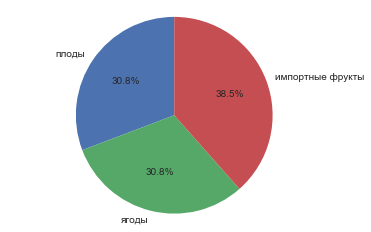

In [29]:
b = 0
p = 0
i = 0 
for each in sn_ls:
    if each in berry:
        b +=1
    if each in plod:
        p +=1
    if each in imported:
        i +=1
labels = ['плоды', "ягоды", "импортные фрукты"]
sizes = [p, b, i]
explode = (0, 0.1, 0.1)  
fig1, ax1 = plt.subplots()
fig1 = plt.figure(figsize=(22, 22))


ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


plt.show()




In [40]:
corr_ls = []
for i, x in enumerate(all_fruit):
    for j, y in enumerate(all_fruit):            
        if x != y:
            r, p = pearsonr(df[x], df[y])
            if abs(r) > 0.7 and p < 0.01:
                print("{0} и {1} к.к равен {2}".format(x, y, r))
                corr_ls.append(("{0} и {1} к.к равен {2}".format(x, y, r)))



Апельсин и Финики к.к равен 0.7237586109266874
Апельсин и Брусника к.к равен 0.870901816390322
Груши и Персики к.к равен 0.7803218538899388
Сливы и Персики к.к равен 0.8451096714750423
Персики и Груши к.к равен 0.7803218538899388
Персики и Сливы к.к равен 0.8451096714750423
Нектарин и Черника к.к равен 0.9302913181456773
Нектарин и Клюква к.к равен 0.929456602728014
Финики и Апельсин к.к равен 0.7237586109266874
Финики и Брусника к.к равен 0.7656139052924997
Брусника и Апельсин к.к равен 0.870901816390322
Брусника и Финики к.к равен 0.7656139052924997
Черника и Нектарин к.к равен 0.9302913181456773
Черника и Клюква к.к равен 0.9938405399220601
Клюква и Нектарин к.к равен 0.929456602728014
Клюква и Черника к.к равен 0.9938405399220601


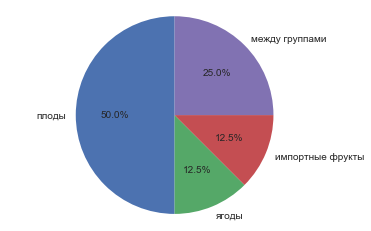

In [48]:
labels = ['плоды', "ягоды", "импортные фрукты", "между группами"]
sizes = [4, 1, 1, 2]
explode = (0, 0.1, 0.1)  
fig1, ax1 = plt.subplots()
fig1 = plt.figure(figsize=(22, 22))


ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()




array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f4bd3c8>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11fa09c50>]], dtype=object)

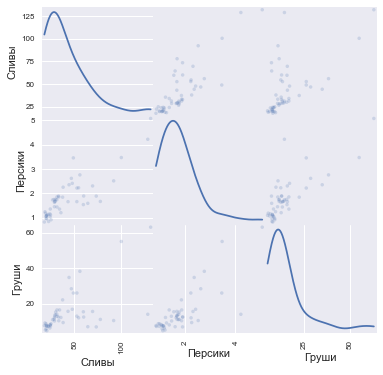

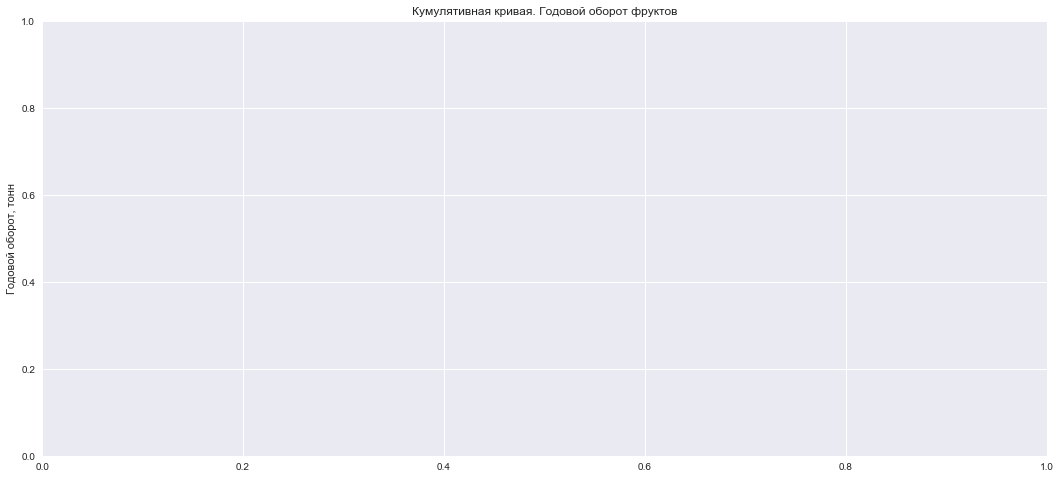

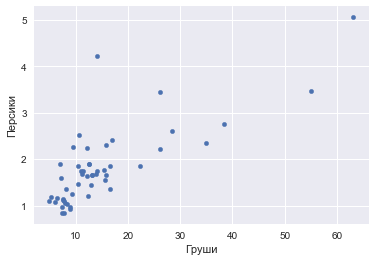

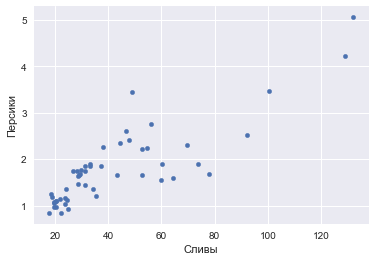

In [54]:
fig = plt.figure(figsize=(18, 8))
ax = fig.add_subplot(1,1,1)

df.plot.scatter("Груши", "Персики")
df.plot.scatter("Сливы", "Персики")

ax.set_ylabel('Годовой оборот, тонн')
ax.set_title("Кумулятивная кривая. Годовой оборот фруктов")

